# Finding the highest ski resort in the USA by scraping wikipedia

In [1]:
%matplotlib inline

import time
import itertools
import re

import pandas as pd

from selenium import webdriver

In [2]:
PATH = r"C:\Users\James\Desktop/chromedriver.exe"
driver = webdriver.Chrome(executable_path=PATH)

In [3]:
#Go to site
driver.get("https://en.wikipedia.org/wiki/List_of_ski_areas_and_resorts_in_the_United_States")

In [4]:
#Find the div containing the content
main_body = driver.find_element_by_id("bodyContent")

In [5]:
#Find all the unordered lists
main_body_lists = main_body.find_elements_by_tag_name('ul')

In [6]:
#Unordered lists we are interested in start at index 7
main_body_lists[7].text

'Mohawk Mountain Ski Area — Cornwall\nMount Southington — Plantsville\nSki Sundown — New Hartford\nWoodbury Ski Area — Woodbury\nPowder Ridge Ski Area — Middlefield'

In [7]:
#Unordered lists we are interested in start at index -6
main_body_lists[-6].text

'49 Degrees North Ski Area — Chewelah\nBadger Mountain Ski Area — Waterville\nBluewood Ski Area — near Dayton\nCrystal Mountain — near Enumclaw\nEcho Valley Ski Area — Chelan\nHurricane Ridge Ski and Snowboard Area — Port Angeles\nLeavenworth Ski Hill — Leavenworth\nLoup Loup Ski Bowl — near Twisp\nMeany Lodge — Snoqualmie Pass (private)\nMission Ridge Ski Area — Wenatchee\nMount Baker Ski Area — Glacier\nMount Spokane Ski and Snowboard Park — near Spokane\nSahalie Ski Club — Snoqualmie Pass (private)\nSitzmark Lifts — Tonasket\nStevens Pass Ski Area — Stevens Pass\nThe Summit at Snoqualmie — Snoqualmie Pass\nAlpental\nSummit Central\nSummit East\nSummit West\nWhite Pass Ski Area — White Pass'

In [8]:
#Final list of lists we are interested in
main_body_lists = main_body_lists[7:-5]

In [9]:
#Empty list to hold links for mountain pages
mountain_links = []

In [11]:
for i in range(len(main_body_lists)): 
    #Find all list items in the unordered lists
    rows = main_body_lists[i].find_elements_by_tag_name("li")
    
    for row in rows:
        try:
            #Put all the first links from each list item into the holder list.
            link = row.find_element_by_tag_name('a')
            mountain_links.append(link.get_attribute('href'))
        except:
            pass

In [12]:
#Remove any duplicate links or links without useful pages 

def link_cleaner(link):
    return not 'redlink=1' in link and not 'List_of_ski_areas' in link and 'wikipedia' in link

clean_links = list(set(filter(link_cleaner,mountain_links)))

In [13]:
len(clean_links)

333

In [14]:
#Empty list for holding Pandas dataframes 
table_holder = []

In [15]:
def table_scraper(driver, link):
    #Sleep to throttle the crawler and ease the load on wikipedia servers
    time.sleep(1)
    #Go to page
    driver.get(link)
    #Find table on the right hand side
    table = driver.find_element_by_class_name("infobox")
    table_html = table.get_attribute('outerHTML')
    #Use Pandas power to convert the table html into to a dataframe
    df = pd.read_html(table_html)[0]
    #Logic to manipulate the raw dataframe into a more useful format
    mountain = df.iloc[0,0]
    df.columns = ['Mountain',mountain]
    df = df.iloc[1:].T
    df.columns = df.iloc[0].tolist()
    df =df.iloc[1:]
    df.reset_index(inplace=True)
    #Only interested in the tables where the number of runs are included
    if "Top elevation" in df.columns:
        return df

In [17]:
for i in range(len(clean_links)):
    try:
        table_holder.append(table_scraper(driver, clean_links[i]))
    except:
        pass

In [18]:
#Merge all dataframes together
results = pd.concat(table_holder)

In [19]:
finalresults = results[['index','Website','Top elevation','Terrain parks','Snowmaking','Snowfall',\
                        'Skiable area','Runs','Lift capacity','Longest run','Lift system','Coordinates','Base\xa0elevation']].copy()

In [20]:
#Set dataframe index to ski resort names
finalresults.index = finalresults['index']
finalresults.drop('index',inplace=True, axis=1)

In [21]:
finalresults

,Website,Top elevation,Terrain parks,Snowmaking,Snowfall,Skiable area,Runs,Lift capacity,Longest run,Lift system,Coordinates,Base elevation
index,,,,,,,,,,,,
Shawnee Mountain,http://www.shawneemt.com,1351 feet,2 total,NaN,NaN,125 acres,23 total,NaN,"5,100 feet","9 total. 1 high-speed detachable quad chair, 1...",NaN,NaN
Loup Loup,Ski the Loup,"5,280 ft (1,610 m)",NaN,NaN,12.5 ft (3.8 m),550 acres (2.2 km2),10,NaN,2 mi (3.2 km),"1 chair, 1 platter lift, 1 rope tow",48°23′41″N 119°54′46″W﻿ / ﻿48.39472°N 119.9127...,"4,040 ft (1,230 m)"
Ski Bluewood,bluewood.com,"5,670 ft (1,728 m)",1,none,300 inches (760 cm),530 acres (2.1 km2),24 - 27% easiest - 43% more difficult - 30%...,"3,950 / hr.",2.2 miles (3.5 km) Country Road,2 triple chairs - (fixed-grip) 1 platter lift,46°04′55″N 117°51′04″W﻿ / ﻿46.082°N 117.851°W﻿...,"4,545 ft (1,385 m)"
Mount Snow,http://www.mountsnow.com,"3,600 ft",12,80%,"156""",589 acres (2.38 km2),87,NaN,Long John 3.1 miles,20,37°56′39″N 67°55′25″W﻿ / ﻿37.94417°N 67.92361°...,"1,900 ft"
Frost Fire,frostfireskiarea.com,"1,400 ft (427 m) AMSL","1, Dragon's Mouth",yes,NaN,NaN,10 - 4 - easiest - 3 - more difficult - 3 -...,NaN,0.5 mi (0.8 km),1 triple chairlift 1 double chairlift 1 magic ...,48°54′43″N 98°04′05″W﻿ / ﻿48.912°N 98.068°W﻿ /...,"1,070 ft (326 m)"
Warner Canyon,Warner Canyon,"6,003 ft (1,830 m)[1]",NaN,NaN,50 inches (1.3 m)[2],200 acres (0.8 km2) [2],22,NaN,4000 ft (1.2 km)[2],1 chair,NaN,"5,271 ft (1,607 m)"
Wisp Resort,NaN,3115 ft - (950 m),NaN,90%,100 in. - (254 cm),132 acres (0.53 km2),34,"12,600 / hr",1.5 miles (2.4 km),"12 chairlifts (2 quad, 5 triple, 4 conveyor, 1...",39°33′29″N 79°21′47″W﻿ / ﻿39.55806°N 79.36306°...,2415 ft - (736 m)
Bigrock,www.bigrockmaine.com,"1,590 feet (480 m)",NaN,NaN,NaN,NaN,27,NaN,NaN,3,46°31′20″N 67°49′40″W﻿ / ﻿46.52222°N 67.82778°...,670 feet (200 m)
Hurricane Ridge Ski and Snowboard Area,hurricaneridge.net,"5,500 feet (1,676 m)",1,none,400 inches (33.3 ft; 10.2 m),NaN,10,NaN,NaN,3 surface lifts,47°58′16″N 123°29′35″W﻿ / ﻿47.971°N 123.493°W﻿...,"4,800 feet (1,463 m)"


In [22]:
#Cleansing of elevation data

elevation = finalresults['Top elevation'].dropna().astype(str)
elevation =elevation.apply(lambda x: x.split(" ")[0])
elevation = elevation.apply(lambda x: re.findall(r'[0-9][0-9,.]+',x)[0])
elevation = elevation.apply(lambda x: x.replace(",","").replace(".",""))
highest_ski_resorts = elevation.astype(int).sort_values()

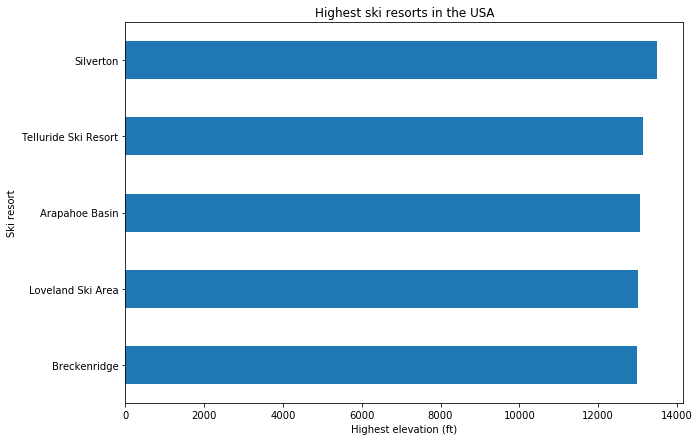

In [30]:
fig = highest_ski_resorts.drop_duplicates().tail(5).plot(kind='barh', title='Highest ski resorts in the USA', figsize=(10,7));
fig.set_xlabel('Highest elevation (ft)')
fig.set_ylabel('Ski resort');